In [1]:
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from th_eventreader import TH_EventReader as py_reader
from th_eventreader import MatEventReader as mat_reader

In [36]:
exp_df = py_reader.exp_df()
row = exp_df.loc[946]
events = py_reader.get_events(**row)
row.pop('session')
mat_events = mat_reader.get_events_from_mat(**row)

/home1/shai.goldman/anaconda2/envs/pgo_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [37]:
events[['mstime', 'pathInfo', 'session', 'original_session_ID']]

,mstime,pathInfo,session,original_session_ID
0,1461597641131,"[{'mstime': 1461597638197, 'x': 384.5869, 'y':...",0,0
1,1461597646265,"[{'mstime': 1461597642633, 'x': 370.4351, 'y':...",0,0
2,1461597649881,"[{'mstime': 1461597647797, 'x': 364.7959, 'y':...",0,0
3,1461597655363,"[{'mstime': 1461597651398, 'x': 388.5267, 'y':...",0,0
4,1461597665898,[],0,0
...,...,...,...,...
255,1461600153294,"[{'mstime': 1461600150862, 'x': 386.4569, 'y':...",0,0
256,1461600157711,"[{'mstime': 1461600154795, 'x': 377.5572, 'y':...",0,0
257,1461600168127,[],0,0
258,1461600172894,[],0,0


In [38]:
mat_events[['mstime', 'pathInfo', 'session']]

,mstime,pathInfo,session
1,1461597641131,"[{'mstime': 1461597638197.0, 'x': 384.5869, 'y...",0
2,1461597646265,"[{'mstime': 1461597642633.0, 'x': 370.4351, 'y...",0
3,1461597649881,"[{'mstime': 1461597647797.0, 'x': 364.7959, 'y...",0
4,1461597655363,"[{'mstime': 1461597651398.0, 'x': 388.5267, 'y...",0
5,1461597665898,"[{'mstime': 1461597647797.0, 'x': 364.7959, 'y...",0
...,...,...,...
255,1461600149361,"[{'mstime': 1461600145893.0, 'x': 398.5193, 'y...",0
256,1461600153294,"[{'mstime': 1461600150862.0, 'x': 386.4569, 'y...",0
257,1461600157711,"[{'mstime': 1461600154795.0, 'x': 377.5572, 'y...",0
258,1461600168127,"[{'mstime': 1461600145893.0, 'x': 398.5193, 'y...",0


In [39]:
py_path = events['pathInfo']
mat_path = mat_events['pathInfo']

In [40]:
start = 50

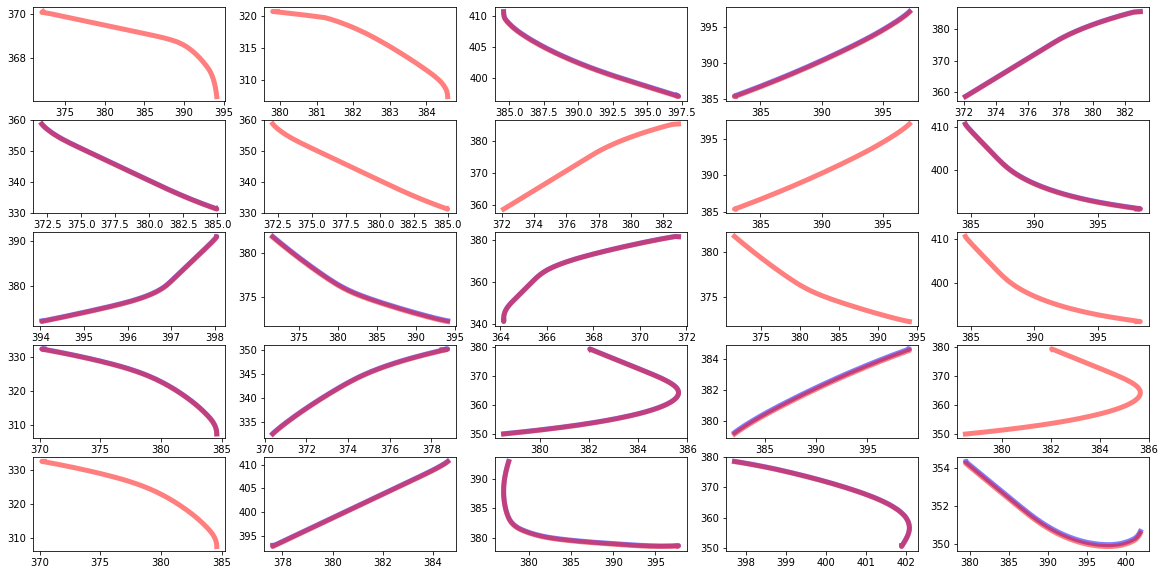

In [41]:
fig, axes = plt.subplots(5, 5, figsize=(20, 10))
for i in range(25):
    pp = py_path.iloc[i+start]
    mp = mat_path.iloc[i+start]
    axes[int(i/5), i%5].plot([p['x'] for p in pp], [p['y']+.1 for p in pp], linewidth=5, color='blue', alpha=.5)
    axes[int(i/5), i%5].plot([p['x'] for p in mp], [p['y'] for p in mp], linewidth=5, color='red', alpha=.5)

In [9]:
from cmlreaders import get_data_index

In [10]:
df = get_data_index('r1')

In [11]:
df = df[df['experiment'] == 'TH1']

In [14]:
i = 20

In [15]:
df[['subject', 'montage', 'session', 'original_session']][i:i+10]

,subject,montage,session,original_session
932,R1163T,0,0,0
933,R1163T,0,1,1
946,R1167M,0,0,0
947,R1167M,0,1,3
956,R1168T,0,0,1
970,R1170J,0,0,0
971,R1170J,2,2,2
972,R1170J,2,3,3
973,R1170J,2,4,4
978,R1171M,0,0,0
